In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

from datetime import date
import datetime as dt

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
!pip install yfinance
import yfinance as yf

In [3]:
!pip install xgboost

In [4]:
import xgboost as xgb
from xgboost import XGBClassifier

In [84]:
#Importing the data
XOM = yf.download('XOM', 
                      start='2015-01-01', 
                      end='2021-12-31', 
                      progress=False)
XOM.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,92.250000,93.050003,91.809998,92.830002,66.025856,10220400
2015-01-05,92.099998,92.400002,89.500000,90.290001,64.219254,18502400
2015-01-06,90.239998,91.410004,89.019997,89.809998,63.877853,16670700
2015-01-07,90.650002,91.480003,90.000000,90.720001,64.525116,13590700
2015-01-08,91.250000,92.269997,91.000000,92.230003,65.599113,15487500


# Pre-processing and cleaning

In [64]:
XOM.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999379,0.999302,0.998581,0.920684,-0.688471
High,0.999379,1.000000,0.999153,0.999342,0.920331,-0.680327
Low,0.999302,0.999153,1.000000,0.999343,0.923423,-0.698996
Close,0.998581,0.999342,0.999343,1.000000,0.922636,-0.689545
Adj Close,0.920684,0.920331,0.923423,0.922636,1.000000,-0.679888
Volume,-0.688471,-0.680327,-0.698996,-0.689545,-0.679888,1.000000


In [65]:
XOM.shape

(1762, 6)

In [66]:
XOM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,72.441209,73.045743,71.798644,72.422168,58.602293,1.651345e+07
std,15.330572,15.263102,15.391891,15.353590,9.410416,9.524771e+06
min,31.410000,32.380001,30.110001,31.450001,27.525694,3.851300e+06
25%,62.707500,63.189999,62.109999,62.582501,56.791901,1.005670e+07
50%,78.204998,78.939999,77.540001,78.285000,61.485962,1.370565e+07
75%,83.017498,83.487499,82.480003,82.977503,64.642664,1.962562e+07
max,95.440002,95.550003,94.639999,95.120003,71.203987,8.443940e+07


In [67]:
XOM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2015-01-02 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1762 non-null   float64
 1   High       1762 non-null   float64
 2   Low        1762 non-null   float64
 3   Close      1762 non-null   float64
 4   Adj Close  1762 non-null   float64
 5   Volume     1762 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.4 KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BE4FC3788>,
      dtype=object)

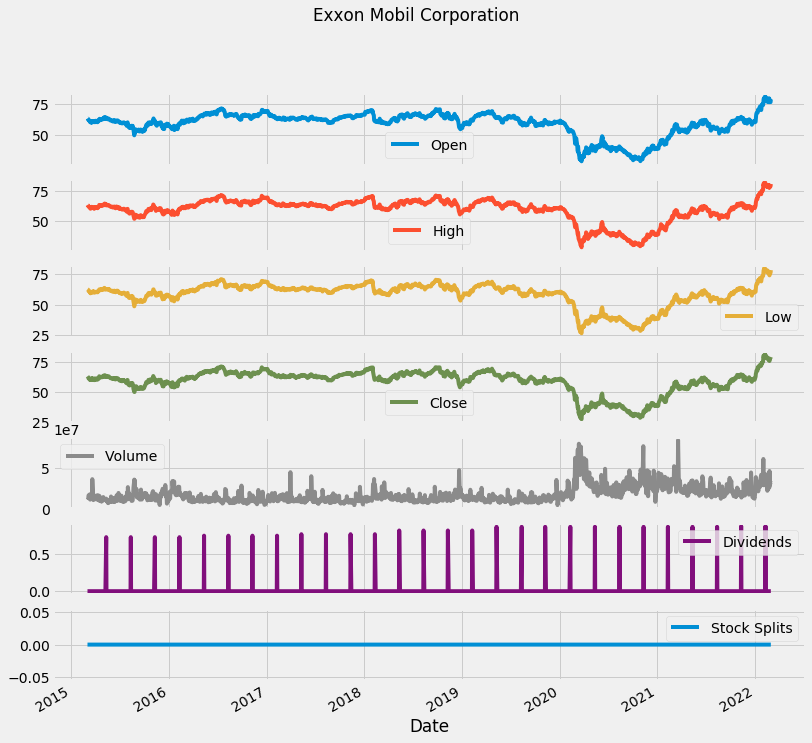

In [68]:
ticker = yf.Ticker('XOM')
XOM = ticker.history(period="7y")
XOM.plot(kind = 'line', title="Exxon Mobil Corporation", figsize = (12,12), subplots = True)

# Strategy-1: 
If the next trading day's close price is greater than today's close price then, the signal is ‘buy’, otherwise ‘sell’.

In [69]:
df1 = XOM.copy()

In [70]:
df1['Target_1'] = np.where(df1['Close'].shift(-1) > df1['Close'], 1, -1)

In [71]:
df1['Target_1'].value_counts()

-1    883
 1    881
Name: Target_1, dtype: int64

In [72]:
df1

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target_1
Date,,,,,,,,
2015-03-02,63.305258,63.434248,62.595816,63.090279,13793700,0.0,0,-1
2015-03-03,63.011446,63.075938,62.438157,62.789299,13493800,0.0,0,-1
2015-03-04,63.032953,63.032953,62.294847,62.473999,13467600,0.0,0,-1
2015-03-05,62.395178,62.481173,62.001040,62.158695,12527600,0.0,0,-1
2015-03-06,61.922211,62.058363,61.141104,61.363251,16070500,0.0,0,-1
...,...,...,...,...,...,...,...,...
2022-02-23,76.459999,77.470001,76.129997,76.769997,25385000,0.0,0,-1
2022-02-24,79.000000,79.029999,74.029999,75.800003,46199900,0.0,0,1
2022-02-25,76.690002,77.989998,76.260002,77.839996,28294600,0.0,0,1


In [73]:
x1 = df1.iloc[:, :-1]
y1 = df1.iloc[:,-1]

In [74]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.20, random_state = 2)

In [75]:
n_scaler = MinMaxScaler()
x1_train = n_scaler.fit_transform(x1_train.astype(np.float))
x1_test = n_scaler.transform(x1_test.astype(np.float))

In [125]:
y1_test.shape

(353,)

# KNN

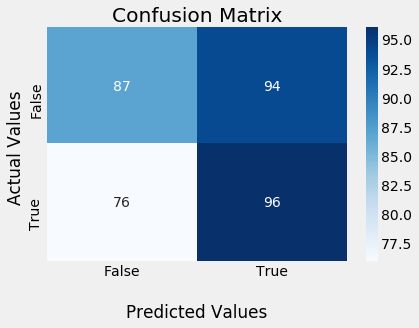

              precision    recall  f1-score   support

          -1       0.53      0.48      0.51       181
           1       0.51      0.56      0.53       172

    accuracy                           0.52       353
   macro avg       0.52      0.52      0.52       353
weighted avg       0.52      0.52      0.52       353

accuracy:  51.84 %


In [77]:
knn = KNeighborsClassifier()
knn.fit(x1_train, y1_train)
y1_pred_knn = knn.predict(x1_test)

knn1 = sns.heatmap(confusion_matrix(y1_test, y1_pred_knn), annot=True, cmap='Blues')

knn1.set_title('Confusion Matrix');
knn1.set_xlabel('\nPredicted Values')
knn1.set_ylabel('Actual Values ');


knn1.xaxis.set_ticklabels(['False','True'])
knn1.yaxis.set_ticklabels(['False','True'])


plt.show()


print(classification_report(y1_test, y1_pred_knn))
print('accuracy: ', round(accuracy_score(y1_test, y1_pred_knn)*100, 2),'%')

# Random Forest

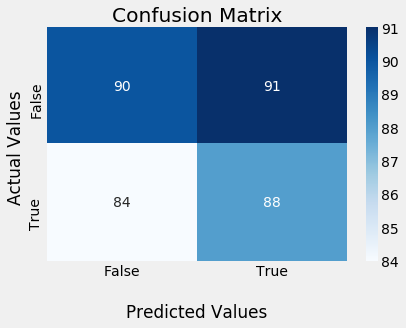

              precision    recall  f1-score   support

          -1       0.52      0.50      0.51       181
           1       0.49      0.51      0.50       172

    accuracy                           0.50       353
   macro avg       0.50      0.50      0.50       353
weighted avg       0.50      0.50      0.50       353

accuracy:  50.42 %


In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x1_train, y1_train)
y1_pred_rf = rf.predict(x1_test)

rf1 = sns.heatmap(confusion_matrix(y1_test, y1_pred_rf), annot=True, cmap='Blues')

rf1.set_title('Confusion Matrix');
rf1.set_xlabel('\nPredicted Values')
rf1.set_ylabel('Actual Values ');


rf1.xaxis.set_ticklabels(['False','True'])
rf1.yaxis.set_ticklabels(['False','True'])


plt.show()

print(classification_report(y1_test, y1_pred_rf))
print('accuracy: ', round(accuracy_score(y1_test, y1_pred_rf)*100, 2),'%')

# Gradient Boosting

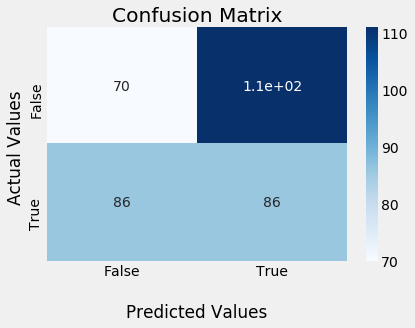

              precision    recall  f1-score   support

          -1       0.45      0.39      0.42       181
           1       0.44      0.50      0.47       172

    accuracy                           0.44       353
   macro avg       0.44      0.44      0.44       353
weighted avg       0.44      0.44      0.44       353

accuracy:  44.19 %


In [111]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x1_train, y1_train)
y1_pred_gb = gb.predict(x1_test)

gb1 = sns.heatmap(confusion_matrix(y1_test, y1_pred_gb), annot=True, cmap='Blues')

gb1.set_title('Confusion Matrix');
gb1.set_xlabel('\nPredicted Values')
gb1.set_ylabel('Actual Values ');


gb1.xaxis.set_ticklabels(['False','True'])
gb1.yaxis.set_ticklabels(['False','True'])


plt.show()

print(classification_report(y1_test, y1_pred_gb))
print('accuracy: ', round(accuracy_score(y1_test, y1_pred_gb)*100, 2),'%')

# Support Vector Machines 

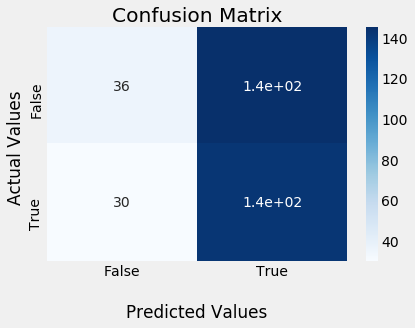

              precision    recall  f1-score   support

          -1       0.55      0.20      0.29       181
           1       0.49      0.83      0.62       172

    accuracy                           0.50       353
   macro avg       0.52      0.51      0.46       353
weighted avg       0.52      0.50      0.45       353

accuracy:  50.42 %


In [80]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x1_train, y1_train)
y1_pred_svc = svc.predict(x1_test)

svc1 = sns.heatmap(confusion_matrix(y1_test, y1_pred_svc), annot=True, cmap='Blues')

svc1.set_title('Confusion Matrix');
svc1.set_xlabel('\nPredicted Values')
svc1.set_ylabel('Actual Values ');


svc1.xaxis.set_ticklabels(['False','True'])
svc1.yaxis.set_ticklabels(['False','True'])


plt.show()

print(classification_report(y1_test, y1_pred_svc))
print('accuracy: ', round(accuracy_score(y1_test, y1_pred_svc)*100, 2),'%')

# XGBoost

C:\Users\reuse\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


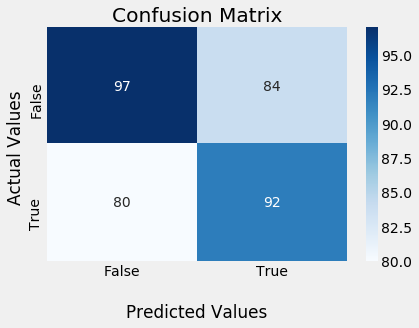

              precision    recall  f1-score   support

          -1       0.55      0.54      0.54       181
           1       0.52      0.53      0.53       172

    accuracy                           0.54       353
   macro avg       0.54      0.54      0.54       353
weighted avg       0.54      0.54      0.54       353

accuracy:  53.54 %


In [81]:
xgb = XGBClassifier()
xgb.fit(x1_train, y1_train)
y1_pred_xgb = xgb.predict(x1_test)

xgb1 = sns.heatmap(confusion_matrix(y1_test, y1_pred_xgb), annot=True, cmap='Blues')

xgb1.set_title('Confusion Matrix');
xgb1.set_xlabel('\nPredicted Values')
xgb1.set_ylabel('Actual Values ');


xgb1.xaxis.set_ticklabels(['False','True'])
xgb1.yaxis.set_ticklabels(['False','True'])


plt.show()

print(classification_report(y1_test, y1_pred_xgb))
print('accuracy: ', round(accuracy_score(y1_test, y1_pred_xgb)*100, 2),'%')


# Strategy-2: 
Utilize the 50-day moving average vs the 200-day moving average.

In [85]:
df2 = XOM.copy()

In [86]:
df2['50MA'] = df2[['Adj Close']].rolling(50).mean()
df2['200MA'] = df2[['Adj Close']].rolling(200).mean()
df2.dropna(inplace = True)

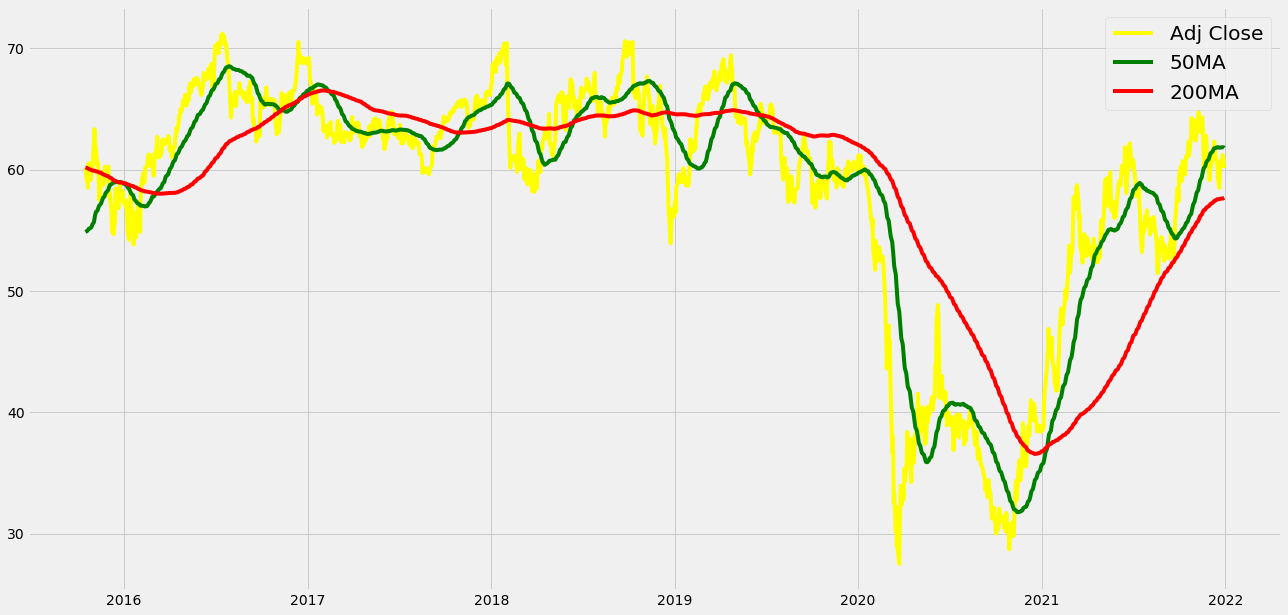

In [113]:
plt.figure(figsize = (20,10))
plt.plot(df2['Adj Close'], label = 'Adj Close', color = 'yellow')
plt.plot(df2['50MA'], label = '50MA', color = 'green')
plt.plot(df2['200MA'], label = '200MA', color = 'red')
plt.legend(loc = 'upper right', fontsize = 'x-large')

In [88]:
df2['Target_2'] = np.where(df2['50MA'].shift(-1) > df2['200MA'], 1, -1)

In [89]:
x2 = df2[['50MA','200MA']].values
y2 = df2['Target_2'].values

In [90]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.20, random_state = 2)

In [91]:
x2_train = n_scaler.fit_transform(x2_train.astype(np.float))
x2_test = n_scaler.transform(x2_test.astype(np.float))

# KNN

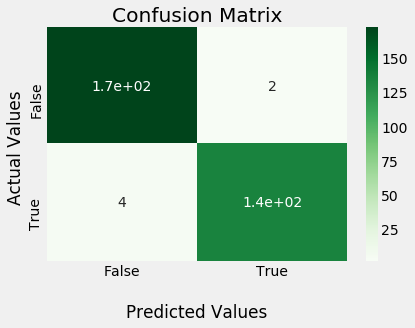

              precision    recall  f1-score   support

          -1       0.98      0.99      0.98       174
           1       0.99      0.97      0.98       139

    accuracy                           0.98       313
   macro avg       0.98      0.98      0.98       313
weighted avg       0.98      0.98      0.98       313

accuracy:  98.08 %


In [92]:
knn.fit(x2_train, y2_train)
y2_pred_knn = knn.predict(x2_test)

knn2 = sns.heatmap(confusion_matrix(y2_test, y2_pred_knn), annot=True, cmap='Greens')

knn2.set_title('Confusion Matrix');
knn2.set_xlabel('\nPredicted Values')
knn2.set_ylabel('Actual Values ');


knn2.xaxis.set_ticklabels(['False','True'])
knn2.yaxis.set_ticklabels(['False','True'])


plt.show()

print(classification_report(y2_test, y2_pred_knn))
print('accuracy: ', round(accuracy_score(y2_test, y2_pred_knn)*100, 2),'%')

# Random Forest

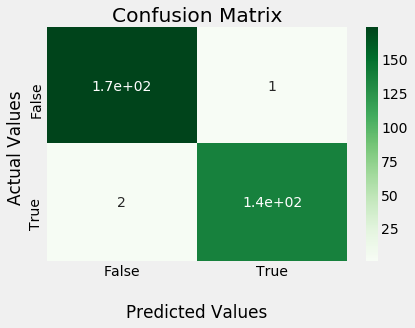

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       174
           1       0.99      0.99      0.99       139

    accuracy                           0.99       313
   macro avg       0.99      0.99      0.99       313
weighted avg       0.99      0.99      0.99       313

accuracy:  99.04 %


In [93]:
rf.fit(x2_train, y2_train)
y2_pred_rf = rf.predict(x2_test)

rf2 = sns.heatmap(confusion_matrix(y2_test, y2_pred_rf), annot=True, cmap='Greens')

rf2.set_title('Confusion Matrix');
rf2.set_xlabel('\nPredicted Values')
rf2.set_ylabel('Actual Values ');


rf2.xaxis.set_ticklabels(['False','True'])
rf2.yaxis.set_ticklabels(['False','True'])


plt.show()

print(classification_report(y2_test, y2_pred_rf))
print('accuracy: ', round(accuracy_score(y2_test, y2_pred_rf)*100, 2),'%')

# Gradient Boosting 

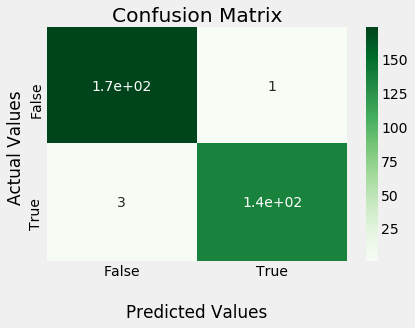

              precision    recall  f1-score   support

          -1       0.98      0.99      0.99       174
           1       0.99      0.98      0.99       139

    accuracy                           0.99       313
   macro avg       0.99      0.99      0.99       313
weighted avg       0.99      0.99      0.99       313

accuracy:  98.72 %


In [94]:
gb.fit(x2_train, y2_train)
y2_pred_gb = gb.predict(x2_test)

gb2 = sns.heatmap(confusion_matrix(y2_test, y2_pred_gb), annot=True, cmap='Greens')

gb2.set_title('Confusion Matrix');
gb2.set_xlabel('\nPredicted Values')
gb2.set_ylabel('Actual Values ');


gb2.xaxis.set_ticklabels(['False','True'])
gb2.yaxis.set_ticklabels(['False','True'])


plt.show()

print(classification_report(y2_test, y2_pred_gb))
print('accuracy: ', round(accuracy_score(y2_test, y2_pred_gb)*100, 2),'%')

# Support Vector Machines 

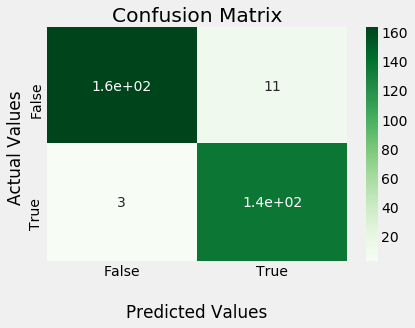

              precision    recall  f1-score   support

          -1       0.98      0.94      0.96       174
           1       0.93      0.98      0.95       139

    accuracy                           0.96       313
   macro avg       0.95      0.96      0.95       313
weighted avg       0.96      0.96      0.96       313

accuracy:  95.53 %


In [95]:
svc.fit(x2_train, y2_train)
y2_pred_svc = svc.predict(x2_test)

svc2 = sns.heatmap(confusion_matrix(y2_test, y2_pred_svc), annot=True, cmap='Greens')

svc2.set_title('Confusion Matrix');
svc2.set_xlabel('\nPredicted Values')
svc2.set_ylabel('Actual Values ');


svc2.xaxis.set_ticklabels(['False','True'])
svc2.yaxis.set_ticklabels(['False','True'])


plt.show()

print(classification_report(y2_test, y2_pred_svc))
print('accuracy: ', round(accuracy_score(y2_test, y2_pred_svc)*100, 2),'%')

# XGBoost

C:\Users\reuse\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


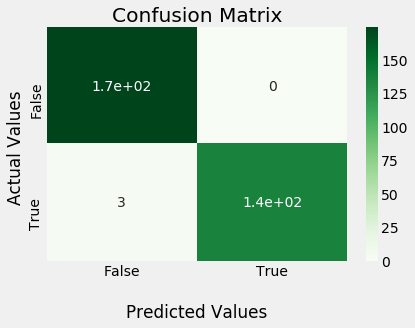

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99       174
           1       1.00      0.98      0.99       139

    accuracy                           0.99       313
   macro avg       0.99      0.99      0.99       313
weighted avg       0.99      0.99      0.99       313

accuracy:  99.04 %


In [96]:
xgb.fit(x2_train, y2_train)
y2_pred_xgb = xgb.predict(x2_test)

xgb2 = sns.heatmap(confusion_matrix(y2_test, y2_pred_xgb), annot=True, cmap='Greens')

xgb2.set_title('Confusion Matrix');
xgb2.set_xlabel('\nPredicted Values')
xgb2.set_ylabel('Actual Values ');


xgb2.xaxis.set_ticklabels(['False','True'])
xgb2.yaxis.set_ticklabels(['False','True'])


plt.show()

print(classification_report(y2_test, y2_pred_xgb))
print('accuracy: ', round(accuracy_score(y2_test, y2_pred_xgb)*100, 2),'%')

In [128]:
strategies = pd.DataFrame({'Classifiers':['KNN', 'RF', 'GB', 'SVC', 'XGB'],
                          'S1':[accuracy_score(y1_test, y1_pred_knn),accuracy_score(y1_test, y1_pred_rf), accuracy_score(y1_test, y1_pred_gb),accuracy_score(y1_test, y1_pred_svc),accuracy_score(y1_test, y1_pred_xgb)],
                          'S2':[accuracy_score(y2_test, y2_pred_knn),accuracy_score(y2_test, y2_pred_rf), accuracy_score(y2_test, y2_pred_gb),accuracy_score(y2_test, y2_pred_svc),accuracy_score(y2_test, y2_pred_xgb)]})

In [129]:
strategies

,Classifiers,S1,S2
0,KNN,0.535411,0.980831
1,RF,0.504249,0.990415
2,GB,0.441926,0.987220
3,SVC,0.504249,0.955272
4,XGB,0.535411,0.990415


# Extra Credit

In [97]:
error = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x1_train, y1_train)
    pred_i = knn.predict(x1_test)
    error.append(np.mean(pred_i != y1_test))

Text(0, 0.5, 'Mean Error')

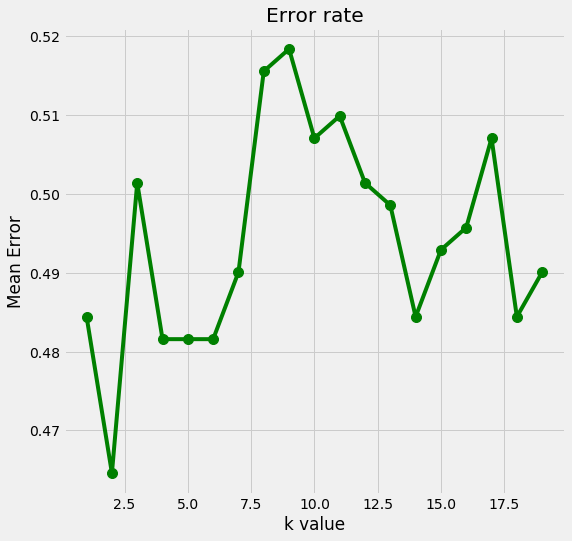

In [122]:
plt.figure(figsize = (8,8))
plt.plot(range(1,20), error, color = 'green', marker = 'o',
         markersize = 10)
plt.title('Error rate')
plt.xlabel('k value')
plt.ylabel('Mean Error')

In [137]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x2_train, y2_train)
y2_pred_knn = knn.predict(x2_test)
print(confusion_matrix(y2_test, y2_pred_knn))
print(classification_report(y2_test, y2_pred_knn))
print('accuracy: ', round(accuracy_score(y2_test, y2_pred_knn)*100, 2),'%')

[[174   0]
 [  3 136]]
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99       174
           1       1.00      0.98      0.99       139

    accuracy                           0.99       313
   macro avg       0.99      0.99      0.99       313
weighted avg       0.99      0.99      0.99       313

accuracy:  99.04 %
